### **TP 02 : Search Algorithm (DFS, BFS) and Graph**

#### **1. Introduction of Search Algorithm**

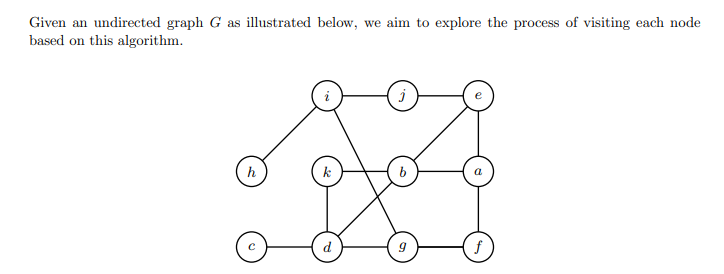

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque, defaultdict


##### **1.1.**

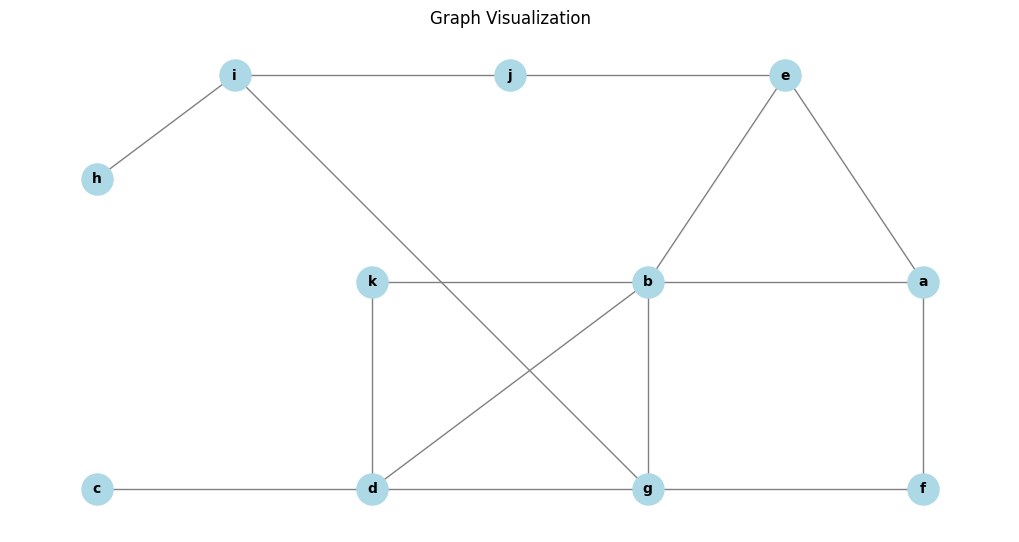

In [25]:
ver = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
arc = [
    ('a', 'b'), ('a', 'e'), ('a', 'f'),
    ('b', 'e'), ('b', 'g'), ('b', 'k'), ('b', 'd'),
    ('c', 'd'),
    ('d', 'k'), ('d', 'g'),
    ('e', 'j'),
    ('f', 'g'),
    ('h', 'i'),
    ('i', 'j'), ('i', 'g')
]
G = nx.Graph()
G.add_nodes_from(ver)
G.add_edges_from(arc)

pos = {
    'i': (2, 4), 'j': (4, 4), 'e': (6, 4), 
    'h': (1, 3), 'k': (3, 2), 'b': (5, 2), 'a': (7, 2),
    'c': (1, 0), 'd': (3, 0), 'g': (5, 0), 'f': (7, 0)
}
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()


##### **1.2.**

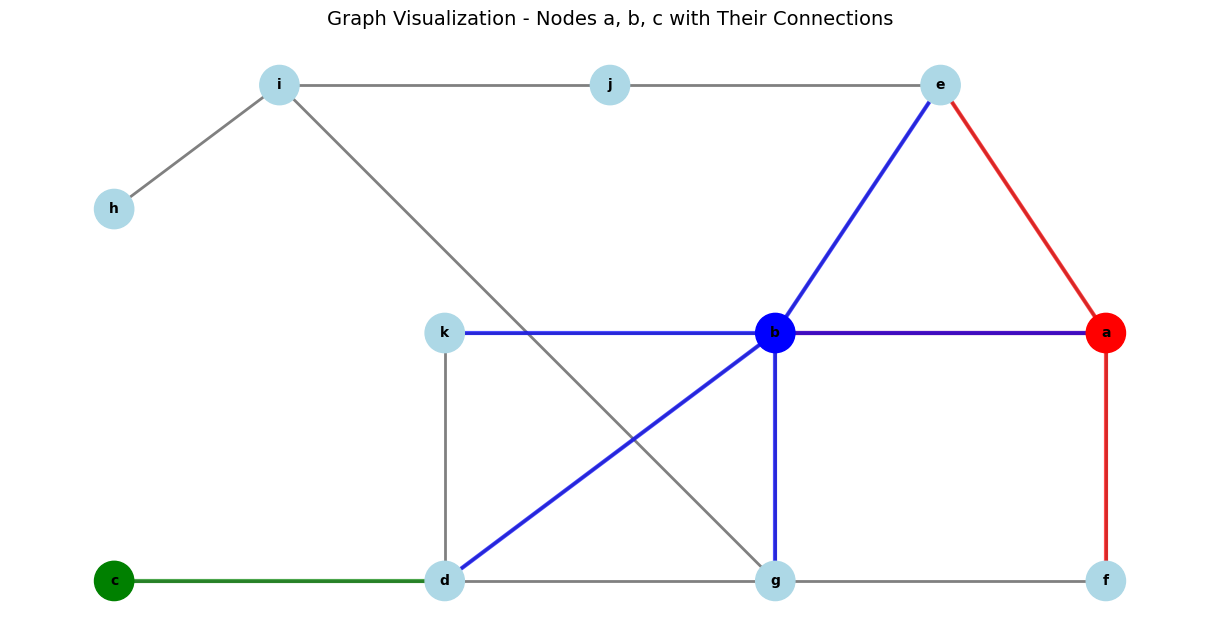

=== DETAILED NEIGHBORHOOD ANALYSIS ===
Node a:
  - Neighbors: ['b', 'e', 'f']
  - Degree: 3
  - Connected to: b, e, f

Node b:
  - Neighbors: ['a', 'd', 'e', 'g', 'k']
  - Degree: 5
  - Connected to: a, d, e, g, k

Node c:
  - Neighbors: ['d']
  - Degree: 1
  - Connected to: d



In [26]:

plt.figure(figsize=(12, 6))

# Create color map - highlight a, b, c in different colors
node_colors = []
for node in G.nodes():
    if node == 'a':
        node_colors.append('red')
    elif node == 'b':
        node_colors.append('blue')
    elif node == 'c':
        node_colors.append('green')
    else:
        node_colors.append('lightblue')

nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=800, font_size=10, font_weight='bold', 
        edge_color='gray', width=2)

# Highlight edges from a, b, c
edges_a = [('a', neighbor) for neighbor in G.neighbors('a')]
edges_b = [('b', neighbor) for neighbor in G.neighbors('b')]
edges_c = [('c', neighbor) for neighbor in G.neighbors('c')]

nx.draw_networkx_edges(G, pos, edgelist=edges_a, width=3, edge_color='red', alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=edges_b, width=3, edge_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=edges_c, width=3, edge_color='green', alpha=0.7)

plt.title("Graph Visualization - Nodes a, b, c with Their Connections", fontsize=14)
plt.show()

# Detailed neighborhood analysis
print("=== DETAILED NEIGHBORHOOD ANALYSIS ===")
for node in ['a', 'b', 'c']:
    neighbors = list(G.neighbors(node))
    degree = G.degree(node)
    print(f"Node {node}:")
    print(f"  - Neighbors: {sorted(neighbors)}")
    print(f"  - Degree: {degree}")
    print(f"  - Connected to: {', '.join(sorted(neighbors))}")
    print()

##### **1.3.**

In [27]:
path = list(nx.all_simple_paths(G, source='a', target='c'))

print("All simple paths from 'a' to 'c':")
for p in path:
    print(" -> ".join(p))   
print(f"Total paths found: {len(path)}")

All simple paths from 'a' to 'c':
a -> b -> e -> j -> i -> g -> d -> c
a -> b -> g -> d -> c
a -> b -> k -> d -> c
a -> b -> d -> c
a -> e -> b -> g -> d -> c
a -> e -> b -> k -> d -> c
a -> e -> b -> d -> c
a -> e -> j -> i -> g -> b -> k -> d -> c
a -> e -> j -> i -> g -> b -> d -> c
a -> e -> j -> i -> g -> d -> c
a -> f -> g -> b -> k -> d -> c
a -> f -> g -> b -> d -> c
a -> f -> g -> d -> c
a -> f -> g -> i -> j -> e -> b -> k -> d -> c
a -> f -> g -> i -> j -> e -> b -> d -> c
Total paths found: 15


##### **1.4.**

In [28]:
bfs_edges = list(nx.bfs_edges(G, source='c'))
dfs_edges = list(nx.dfs_edges(G, source='c'))

print("BFS edges from 'c':")
for u, v in bfs_edges:
    print(f"  - {u} -> {v}")

print("DFS edges from 'c':")
for u, v in dfs_edges:
    print(f"  - {u} -> {v}")

BFS edges from 'c':
  - c -> d
  - d -> b
  - d -> k
  - d -> g
  - b -> a
  - b -> e
  - g -> f
  - g -> i
  - e -> j
  - i -> h
DFS edges from 'c':
  - c -> d
  - d -> b
  - b -> a
  - a -> e
  - e -> j
  - j -> i
  - i -> h
  - i -> g
  - g -> f
  - b -> k


##### **1.5.**

#### **3**

##### **3.5.**

In [29]:
path_c_h = list(nx.all_simple_paths(G, source='c', target='h'))

print("All simple paths from 'c' to 'h':")
for p in path_c_h:
    
    print(" -> ".join(p))
print(f"Total paths found: {len(path_c_h)}")

All simple paths from 'c' to 'h':
c -> d -> b -> a -> e -> j -> i -> h
c -> d -> b -> a -> f -> g -> i -> h
c -> d -> b -> e -> a -> f -> g -> i -> h
c -> d -> b -> e -> j -> i -> h
c -> d -> b -> g -> f -> a -> e -> j -> i -> h
c -> d -> b -> g -> i -> h
c -> d -> k -> b -> a -> e -> j -> i -> h
c -> d -> k -> b -> a -> f -> g -> i -> h
c -> d -> k -> b -> e -> a -> f -> g -> i -> h
c -> d -> k -> b -> e -> j -> i -> h
c -> d -> k -> b -> g -> f -> a -> e -> j -> i -> h
c -> d -> k -> b -> g -> i -> h
c -> d -> g -> b -> a -> e -> j -> i -> h
c -> d -> g -> b -> e -> j -> i -> h
c -> d -> g -> f -> a -> b -> e -> j -> i -> h
c -> d -> g -> f -> a -> e -> j -> i -> h
c -> d -> g -> i -> h
Total paths found: 17


##### **3.6.**

In [30]:
dfs_edges_3 = list(nx.dfs_edges(G, source='c'))
print("DFS edges from 'c':")
print(dfs_edges_3)

DFS edges from 'c':
[('c', 'd'), ('d', 'b'), ('b', 'a'), ('a', 'e'), ('e', 'j'), ('j', 'i'), ('i', 'h'), ('i', 'g'), ('g', 'f'), ('b', 'k')]


DFS path from 'c' to 'h':
c -> d -> b -> a -> e -> j -> i -> h


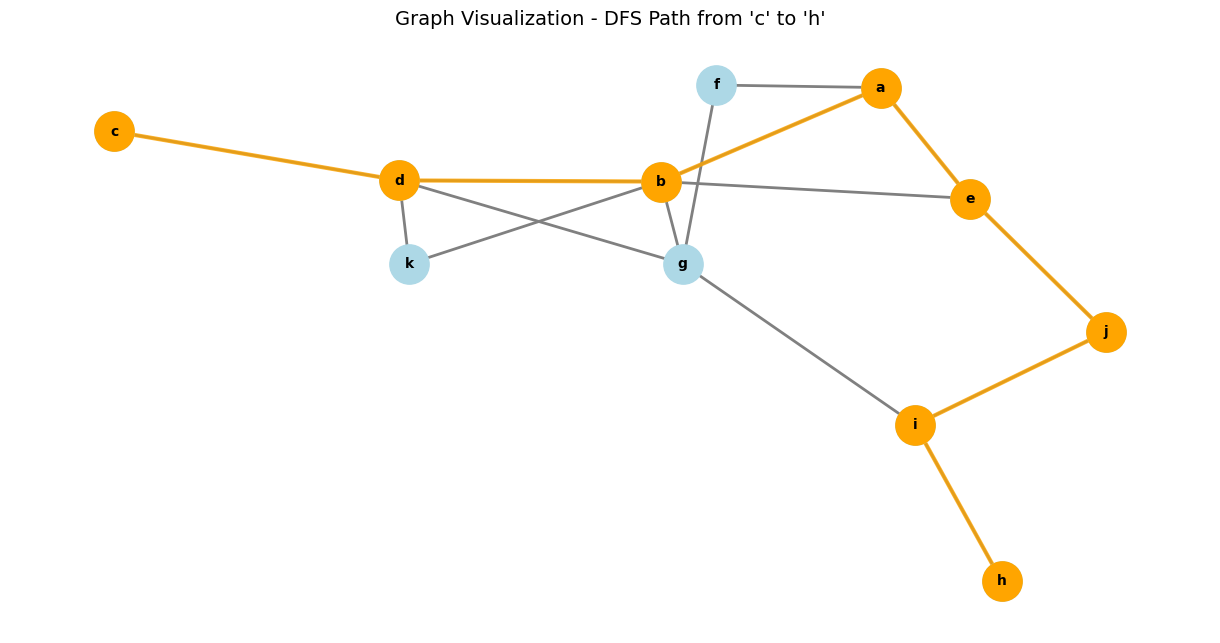

In [31]:
def explore_dfs(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()
    
    path.append(start)
    visited.add(start)
    
    if start == goal:
        return path
    
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            result = explore_dfs(graph, neighbor, goal, path.copy(), visited)
            if result is not None:
                return result
    
    return None

dfs_path_c_h = explore_dfs(G, 'c', 'h')
print("DFS path from 'c' to 'h':")
print(" -> ".join(dfs_path_c_h) if dfs_path_c_h else "No")

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold', edge_color='gray', width=2)

#highlight the dfs
if dfs_path_c_h:
    dfs_edges_path = list(zip(dfs_path_c_h[:-1], dfs_path_c_h[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=dfs_edges_path, width=3, edge_color='orange', alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=dfs_path_c_h, node_color='orange', node_size=800)

plt.title("Graph Visualization - DFS Path from 'c' to 'h'", fontsize=14)
plt.show()